# Анализ данных Sample-Superstore Sales по продуктам и геолокации

## Оглавление:
* [0. Предварительная обработка данных](#zero-bullet)    
* [1. Исследование данных](#one-bullet)     
    + [1.1 Статистика по продуктам](#scoring-bullet)
     - [Возвраты](#returns-bullet)
    + [1.2 Влияние географического положения](#geography-bullet)  
     - [Количество представленных наименований](#number-bullet)   
     - [Прибыль](#profit-bullet) [по сегментам,](#profit-segments-bullet) [категориям](#profit-categories-bullet) и [подкатегориям](#profit-subcategories-bullet)
     - [Время доставки](#delivery-bullet)
* [2. Выводы и рекомендации](#two-bullet)    

## 0. Предварительная обработка данных <a class="anchor" id="zero-bullet"></a>

Источник данных: https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime

#визуализация
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#свойства f-строк
import colorama
from colorama import Fore, Style

In [2]:
#параметры визуализаций
sns.set(style="darkgrid")
sns.set(palette = 'deep')
sns.set(rc={'figure.figsize':(5,3)})

In [3]:
#загрузка данных о заказах из той же папки, где находится Jupiter Notebook
df = pd.read_excel("Sample - Superstore.xls", sheet_name='Orders')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#данные о возвратах
df_returns = pd.read_excel("Sample - Superstore.xls", sheet_name='Returns')
#заменяю Yes на 1 для удобства дальнейших расчетов
df_returns['Returned'] = df_returns['Returned'].replace('Yes', 1)
df_returns.head()

,Returned,Order ID
0,1,CA-2017-153822
1,1,CA-2017-129707
2,1,CA-2014-152345
3,1,CA-2015-156440
4,1,US-2017-155999


In [5]:
df_returns.shape

(296, 2)

In [6]:
#объединяю датафреймы, переназывая полученный df
df = pd.merge(df, df_returns, on='Order ID', how='left')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,NaN
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,1.0
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,1.0
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,1.0


Теперь df - общий датафрейм, содержащий всю информацию о заказах и возвратах.

In [7]:
#размер датасета
df.shape

(9994, 22)

In [8]:
#количество пропущенных значений
df.isna().sum()

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Returned         9194
dtype: int64

Пропущенные значения только в столбце Returned - для товаров, по которым не было возвратов.

In [9]:
#количество дубликатов
df.duplicated().sum()

0

In [10]:
#типы данных в колонках
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Returned                float64
dtype: object

In [11]:
#заменяю пробелы в названиях колонок на _
df = df.rename(columns=lambda x: x.replace(' ', '_'))
#результат
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Returned'],
      dtype='object')

Перейдем к исследованию.

## 1. Исследование данных <a class="anchor" id="one-bullet"></a>

In [12]:
print(f'{Fore.BLUE}В данных представленна статистика с {df.Order_Date.dt.year.min()} по {df.Order_Date.dt.year.max()} год.{Style.RESET_ALL}')
print('В ходе расчетов агрегировались данные по всему этому промежутку.')

В данных представленна статистика с 2014 по 2017 год.
В ходе расчетов агрегировались данные по всему этому промежутку.


In [13]:
print(f'{Fore.BLUE}Данные представлены по {df.City.nunique()} городу, {df.State.nunique()} штатам и {df.Region.nunique()} регионам {df.Country.unique()[0]}.')

Данные представлены по 531 городу, 49 штатам и 4 регионам United States.


In [14]:
#регионы, представленные в данных
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [15]:
#являются ли Product_ID и Product Name уникальными
df.Product_ID.nunique()

1862

In [16]:
df.Product_Name.nunique()

1850

Так как количество уникальных Product_ID больше, чем Product_Name, буду считать Product_ID уникальным идентификатором продукта.

<font color = #2B65EC >**Критерии оценки продаж продуктов:**    

    1. Маржа прибыли (Profit_Margin = 100%*Profit/Sales),
    2. Суммарная прибыль (Profit),
    3. Число покупок продукта (Quantity),
    4. Число возвратов.
    
**<font color = #2B65EC >Факторы, влияющие на продажи по географическому положению:**    

    5. Количество представленных наименований,
    6. Прибыльность по категориям/подкатегориям (Profit by Category/Sub-Category),
       Прибыльность по сегментам (Profit by Segment),
    7. Среднее время доставки для разных режимов (Delivery_Time).

*Суммарную выручку (Sales) не беру в качестве критерия, так как она учтена в показателе Profit_Margin.*    

In [17]:
#добавляю столбец Profit_Margin = 100% * Profit/Sales 
df['Profit_Margin'] = 100*df.Profit/df.Sales

In [18]:
#добавляю столбец Delivery_Time
df['Delivery_Time'] = df.Ship_Date - df.Order_Date

In [19]:
#проверка
df.head(2)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Returned,Profit_Margin,Delivery_Time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,NaN,16.0,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,NaN,30.0,3 days


## 1.1 Статистика по продуктам  <a class="anchor" id="scoring-bullet"></a>    

<font color = #2B65EC>Рассмотрим следующие метрики оценки продуктов без привязки к географии заказов:    
    
    1. Маржа прибыли (100%*Profit/Sales),
    2. Суммарная выручка (Profit),    
    3. Количество проданных товаров (Quantity),
    4. Число возвратов (Returned).    

При группировке по продуктам будет неправильно брать среднюю маржу прибыли, нужно рассчитать средневзвешенную, как:    
(Quantity1 * Profit_Margin1 + Quantity2 * Profit_Margin2 + ...) / (Quantity1+Quantity2+..)

In [20]:
#вспомогательный показатель для расчета средневзвешенной маржи прибыли по продукту
df['x_Profit_Margin'] = df.Profit_Margin*df.Quantity

In [21]:
#информация о покупках каждого продукта
df_products = df.groupby(['Product_ID', 'Product_Name', 'Category', 'Sub-Category'], as_index=False) \
    .agg({'x_Profit_Margin': 'sum', # Quantity1*Profit_Margin1 + Quantity2*Profit_Margin2 + ...
          'Profit': 'sum',          # суммарная выручка
          'Quantity': 'sum',        # суммарное количество купленных продуктов (Quantity1+Quantity2+..)
          'Returned': 'sum'}) 

#средневзвешенная маржа прибыли от каждого продукта
df_products['Weighted_Avg_Margin'] = df_products['x_Profit_Margin'] / df_products['Quantity'] 
#удаляю вспомогательный столбец
df_products.drop('x_Profit_Margin', axis=1, inplace=True)

df_products.head()

,Product_ID,Product_Name,Category,Sub-Category,Profit,Quantity,Returned,Weighted_Avg_Margin
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",Furniture,Bookcases,-117.8820,9,0.0,-14.285714
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,24.1960,10,1.0,1.858824
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,Furniture,Bookcases,311.1836,14,1.0,12.612395
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,-133.1092,21,1.0,-55.333333
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",Furniture,Bookcases,229.9752,12,0.0,27.000000


### Распределения для метрик оценки продуктов 

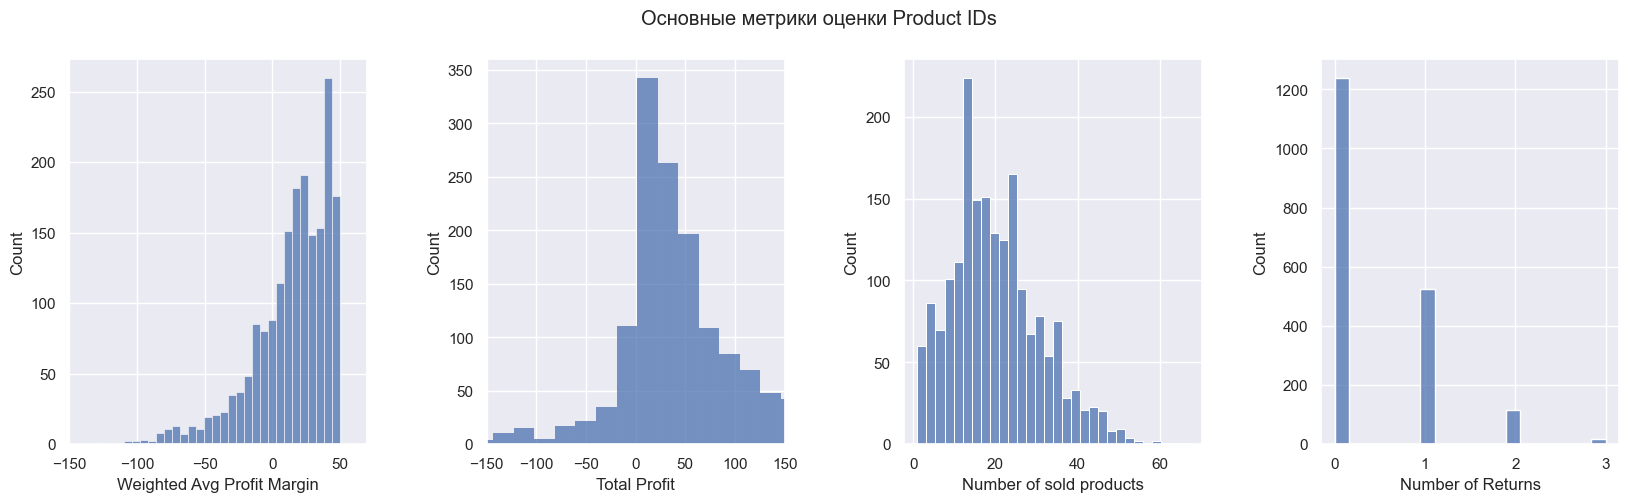

In [22]:
#задаю сетку 1 на 4
fig, axes = plt.subplots(1, 4, figsize=(20,5))
#заголовок
plt.suptitle("Основные метрики оценки Product IDs") 

#гистограммы распределений
sns.histplot(data=df_products, x="Weighted_Avg_Margin", ax=axes[0])
axes[0].set_xlabel("Weighted Avg Profit Margin")
axes[0].set_xlim(-150, 70) #обрезаю выбросы для наглядности

sns.histplot(data=df_products, x="Profit", ax=axes[1])
axes[1].set_xlabel("Total Profit")
axes[1].set_xlim(-150, 150) #обрезаю выбросы для наглядности

sns.histplot(data=df_products, x="Quantity",ax=axes[2])
axes[2].set_xlabel("Number of sold products")

sns.histplot(data=df_products, x="Returned",ax=axes[3])
axes[3].set_xlabel("Number of Returns")

fig.subplots_adjust(wspace=0.4)
plt.show()

Выводы из распределений выше:  
* есть много товаров с отрицательными прибылью и маржой прибыли,    
* число возвратов составляет от 0 до 3. 

Стоит учитывать, что крупные товары покупаются реже мелких, независимо от других факторов.    
При этом большой объём продаж не означает большой прибыли.    
Поэтому <font color = #2B65EC>для дальнейшего анализа главным критерием буду считать не количество купленных продуктов, а прибыль от их продажи.   

### Продукты с наибольшим числом возвратов <a class="anchor" id="returns-bullet"></a>    

In [23]:
#больше 2 возвратов
df_products.query('Returned>2').sort_values('Category', ascending=False)

,Product_ID,Product_Name,Category,Sub-Category,Profit,Quantity,Returned,Weighted_Avg_Margin
1831,TEC-PH-10003171,Plantronics Encore H101 Dual Earpieces Headset,Technology,Phones,163.6180,18,3.0,21.000000
549,OFF-AR-10001958,Stanley Bostitch Contemporary Electric Pencil ...,Office Supplies,Art,42.7896,19,3.0,14.736842
654,OFF-BI-10000174,Wilson Jones Clip & Carry Folder Binder Tool f...,Office Supplies,Binders,50.2280,47,3.0,11.028369
668,OFF-BI-10000546,Avery Durable Binders,Office Supplies,Binders,13.8240,50,3.0,-32.175000
730,OFF-BI-10002012,Wilson Jones Easy Flow II Sheet Lifters,Office Supplies,Binders,5.6160,49,3.0,-39.374150
734,OFF-BI-10002071,Fellowes Black Plastic Comb Bindings,Office Supplies,Binders,-4.4156,34,3.0,-47.705882
741,OFF-BI-10002215,"Wilson Jones Hanging View Binder, White, 1""",Office Supplies,Binders,55.2380,23,3.0,37.782609
763,OFF-BI-10002852,Ibico Standard Transparent Covers,Office Supplies,Binders,104.8128,34,3.0,-8.000000
917,OFF-FA-10000304,Advantus Push Pins,Office Supplies,Fasteners,20.2086,27,3.0,36.083333
1210,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",Office Supplies,Paper,60.4032,13,3.0,48.000000


**Точка роста:**    
<font color = #2B65EC > Проверить качество продуктов из списка выше и поднять вопросе об отказе от распространения товаров, не прошедших проверку.

#### Какие товары имеют отрицательную прибыль и маржу прибыли по стране? <a class="anchor" id="2"></a>    

In [24]:
df_products.query("Profit < 0").sort_values('Profit').head(2)

,Product_ID,Product_Name,Category,Sub-Category,Profit,Quantity,Returned,Weighted_Avg_Margin
1645,TEC-MA-10000418,Cubify CubeX 3D Printer Double Head Print,Technology,Machines,-8879.9704,9,0.0,-112.407407
1650,TEC-MA-10000822,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,-4589.9730,18,0.0,-44.753086


In [25]:
df_products.query("Weighted_Avg_Margin < 0").sort_values('Profit').head(2)

,Product_ID,Product_Name,Category,Sub-Category,Profit,Quantity,Returned,Weighted_Avg_Margin
1645,TEC-MA-10000418,Cubify CubeX 3D Printer Double Head Print,Technology,Machines,-8879.9704,9,0.0,-112.407407
1650,TEC-MA-10000822,Lexmark MX611dhe Monochrome Laser Printer,Technology,Machines,-4589.9730,18,0.0,-44.753086


In [26]:
print(f'{Fore.BLUE}{len(df_products.query("Profit < 0"))} продуктов имеют отрицательную cуммарную прибыль и {len(df_products.query("Weighted_Avg_Margin < 0"))} продуктов - отрицательную средневзвешенную маржу прибыли по стране')

306 продуктов имеют отрицательную cуммарную прибыль и 469 продуктов - отрицательную средневзвешенную маржу прибыли по стране


In [27]:
#для проверки нахожу пересечение данных списков продуктов, размер списка
len(df_products.query("Profit < 0 & Weighted_Avg_Margin < 0"))

306

**Точка роста:**    
<font color = #2B65EC >Поднять вопрос о сокращении продаж товаров с отрицательной прибылью. 
    Если такие товары продаются в разных городах, и в части городов прибыль положительна, то исследовать, с чем связан убыток в других.     

Отдельно изучим список продуктов с отрицательной средневзвешенной маржой прибыли, но положительной сумарной прибылью по стране.    
В каких регионах данные продукты прибыльно продавать, а в каких - нет?

In [28]:
#список товаров с отрицательной маржой, но положительной прибылью 
products_1 = df_products.query("Profit > 0 & Weighted_Avg_Margin < 0").Product_ID

In [29]:
#нахожу эти товары в исходной таблце, группирую по региону и категории
df_neg_margin = df.query('Product_ID in @products_1') \
    .groupby(['Region','Category', 'Product_ID', 'Product_Name'], as_index = False) \
    .agg({'Profit':'sum', 'Quantity':'sum'}) \
    .sort_values(['Product_ID','Profit'], ascending = False)
df_neg_margin.head()

,Region,Category,Product_ID,Product_Name,Profit,Quantity
149,Central,Technology,TEC-PH-10003931,JBL Micro Wireless Portable Bluetooth Speaker,14.9975,5
538,West,Technology,TEC-PH-10003931,JBL Micro Wireless Portable Bluetooth Speaker,8.9985,3
292,East,Technology,TEC-PH-10003931,JBL Micro Wireless Portable Bluetooth Speaker,-8.9985,9
148,Central,Technology,TEC-PH-10002824,Jabra SPEAK 410 Multidevice Speakerphone,51.4975,5
398,South,Technology,TEC-PH-10002824,Jabra SPEAK 410 Multidevice Speakerphone,51.4975,5


Видим, например, товар TEC-PH-10003931 дал положительный профит в Central и West регионах, но отрицательную - в East регионе. Следовательно, стоит сократить его продажу на востоке, но оставить в остальных регионах.

Вынесем список таких продуктов с уточнением штата, где его продажи убыточны.

**Список продуктов, убыточных в конкретных штатах:** <a class="anchor" id="3"></a>    

In [30]:
#нахожу эти товары в исходной таблце, группирую по региону и категории
df_neg_profit_state = df.query('Product_ID in @products_1') \
    .groupby(['Region','State', 'Category', 'Product_ID', 'Product_Name'], as_index = False) \
    .agg({'Profit':'sum', 'Quantity':'sum'}) \
    .sort_values(['Product_ID','Profit'], ascending = False) \
    .query('Profit<0')
df_neg_profit_state[['Region','State','Category', 'Product_ID', 'Product_Name']]

,Region,State,Category,Product_ID,Product_Name
454,East,Ohio,Technology,TEC-PH-10003931,JBL Micro Wireless Portable Bluetooth Speaker
453,East,Ohio,Technology,TEC-PH-10002824,Jabra SPEAK 410 Multidevice Speakerphone
452,East,Ohio,Technology,TEC-PH-10000560,Samsung Galaxy S III - 16GB - pebble blue (T-M...
451,East,Ohio,Technology,TEC-MA-10000864,Cisco 9971 IP Video Phone Charcoal
824,West,Colorado,Technology,TEC-MA-10000597,Lexmark S315 Color Inkjet Printer
...,...,...,...,...,...
455,East,Pennsylvania,Furniture,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall
409,East,Ohio,Furniture,FUR-BO-10004015,"Bush Andora Bookcase, Maple/Graphite Gray Finish"
838,West,Oregon,Furniture,FUR-BO-10003660,"Bush Cubix Collection Bookcases, Fully Assembled"
149,Central,Texas,Furniture,FUR-BO-10001811,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust..."


**Точка роста:**    
<font color = #2B65EC > Сократить продажу товаров в штатах из списка выше. 

Далее рассмотрим влияние географического положения заказов на эффективность продаж.

## 1.2 Влияние географического положения  <a class="anchor" id="geography-bullet"></a>    

<font color = #2B65EC> Факторы, зависящие от географического положения:    

    5. Количество представленных наименований,
    6. Прибыльность по категориям/подкатегориям (Profit by Category/Sub-Category),
       Прибыльность по сегментам (Profit by Segment),
    7. Среднее время доставки для разных режимов (Delivery_Time).

### Количество представленных наименований по регионам <a class="anchor" id="number-bullet"></a>

In [31]:
#количество наименований продуктов по регионам
df_region = df.groupby(['Region'], as_index = False) \
    .agg({'Product_ID':'nunique'}) \
    .rename(columns={'Product_ID':'Number_of_Products'}) \
    .sort_values('Number_of_Products', ascending = False)
df_region

,Region,Number_of_Products
3,West,1509
1,East,1422
0,Central,1310
2,South,1057


In [32]:
100*(1-1057/1509)

29.953611663353218

<font color = #2B65EC >На юге представленно почти на 30% наименований товаров меньше, чем на западе.    

**Точка роста:**    
<font color = #2B65EC > Поднять вопрос о возможном расширение линейки товаров, которые хорошо продаются в южном регионе.

### Прибыль <a class="anchor" id="profit-bullet"></a>

Какие сегменты, категории и подкатегории товаров принесли наибольшую прибыль в зависимости от геолокации?

### Прибыль по сегментам по регионам <a class="anchor" id="profit-segments-bullet"></a>

In [33]:
#данные о прибыли по регионам и сегментам
df_region_segment = df \
    .groupby(['Region','Segment'], as_index = False) \
    .agg({'Profit':'sum', 'Quantity':'sum'}) \
    .sort_values(['Region','Profit'], ascending = False)
df_region_segment.head()

,Region,Segment,Profit,Quantity
9,West,Consumer,57450.6040,6477
10,West,Corporate,34437.4299,3630
11,West,Home Office,16530.4150,2159
6,South,Consumer,26913.5728,3178
7,South,Corporate,15215.2232,2016


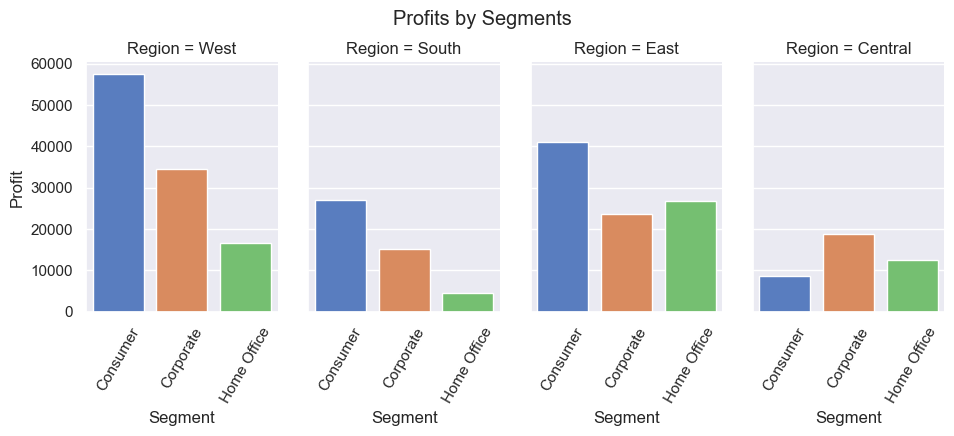

In [34]:
g = sns.catplot(
    data=df_region_segment, x="Segment", y="Profit", col="Region",
    kind="bar", height=3.5, aspect=.7, palette ="muted"
)
g.set_xticklabels(rotation=60)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Profits by Segments', y=1.05)
plt.show()

<font color = #2B65EC > Примечательно, что в центральном регионе Consumer сегмент принес наименьшую прибыль,     
    в то время как на Западе, Востоке и Юге он был наиболее прибыльным.

**Точка роста:**    
<font color = #2B65EC > Расширять линейки более прибыльных сегментов по регионам и не расширять - менее прибыльных, с учетом статистики по штатам и городам.     
    Изучить причины низких прибылей от сегмента Consumer в центральном регионе.

### Прибыль по сегментам по штатам 

In [35]:
#группирую с учетом региона и штата
df_state_segment = df \
    .groupby(['State','Segment'], as_index = False) \
    .agg({'Profit':'sum', 'Quantity':'sum'}) \
    .sort_values(['Profit'], ascending = False)
df_state_segment.head()

,State,Segment,Profit,Quantity
88,New York,Consumer,39640.5183,2404
9,California,Consumer,38374.0392,4081
10,California,Corporate,24367.8441,2291
131,Washington,Consumer,19817.3052,990
90,New York,Home Office,17873.4822,625


#### Cамые прибыльные сегменты по штатам: <a class="anchor" id="profit-segments-states-bullet"></a>

In [36]:
#самые прибыльные сегменты в каждом штате (с положительной прибылью)
df_top_state_segment = df_state_segment.loc[df_state_segment.groupby('State')['Profit'].idxmax()] \
    .query('Profit>0') \
    .sort_values(['Segment','Profit'], ascending = False)
df_top_state_segment

,State,Segment,Profit,Quantity
110,Rhode Island,Home Office,5519.8329,81
78,Nevada,Home Office,1806.9133,30
72,Montana,Home Office,1542.8201,32
81,New Hampshire,Home Office,1009.7256,59
40,Iowa,Home Office,469.8738,26
87,New Mexico,Home Office,457.1837,53
43,Kansas,Home Office,286.5816,22
135,West Virginia,Home Office,262.8752,15
139,Wyoming,Home Office,100.1960,4
36,Indiana,Corporate,12293.7208,154


<font color = #2B65EC > Выше показаны самые "прибыльные" сегменты для каждого штата. 

**Точка роста:**    
<font color = #2B65EC > Рассмотреть возможность расширения линейки товаров самых прибыльных по штатам сегментов. 

При этом в некоторых штатах даже самые прибыльные сегменты дают отрицательную прибыль:<a class="anchor" id="profit-segments-badstates-bullet"></a>

In [37]:
#самые прибыльные сегменты в каждом штате (с отрицательной прибылью)
df_top_state_segment_negative = df_state_segment.loc[df_state_segment.groupby('State')['Profit'].idxmax()] \
    .query('Profit<0') \
    .sort_values(['Segment','Profit'], ascending = False)
df_top_state_segment_negative

,State,Segment,Profit,Quantity
98,Ohio,Home Office,-749.1280,360
93,North Carolina,Home Office,-990.4365,118
121,Texas,Home Office,-1084.6682,588
34,Illinois,Home Office,-2644.1119,350
107,Pennsylvania,Home Office,-3071.0510,410
13,Colorado,Corporate,-566.0659,200
117,Tennessee,Corporate,-640.0382,218
4,Arizona,Corporate,-788.9158,268
23,Florida,Consumer,-137.2829,596


**Точка роста:**    
<font color = #2B65EC > В штатах из списка выше даже самые "прибыльные" сегменты убыточны.       
    Изучить причины убыточности продаж в этих штатах. Вожможно, сократить туда поставку товаров.

### Прибыль по категориям по регионам <a class="anchor" id="profit-categories-bullet"></a>

In [38]:
#группирую с учетом региона и категорий
df_region_cat = df \
    .groupby(['Region','Category'], as_index = False) \
    .agg({'Profit':'sum', 'Quantity':'sum'}) \
    .sort_values(['Region','Profit'], ascending = False)
df_region_cat

,Region,Category,Profit,Quantity
10,West,Office Supplies,52609.8490,7235
11,West,Technology,44303.6496,2335
9,West,Furniture,11504.9503,2696
8,South,Technology,19991.8314,1118
7,South,Office Supplies,19986.3928,3800
6,South,Furniture,6771.2061,1291
5,East,Technology,47462.0351,1942
4,East,Office Supplies,41014.5791,6462
3,East,Furniture,3046.1658,2214
2,Central,Technology,33697.4320,1544


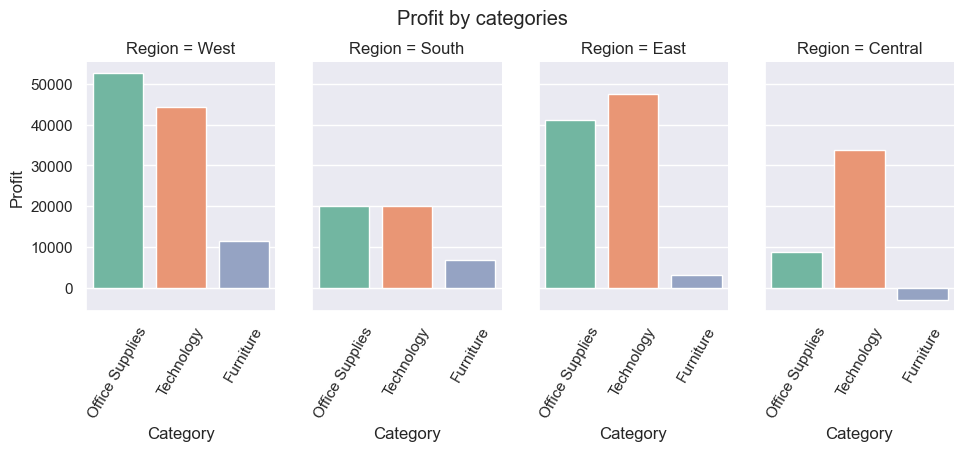

In [39]:
g = sns.catplot(
    data=df_region_cat, x="Category", y="Profit", col="Region",
    kind="bar", height=3.5, aspect=.7, palette = "Set2"
)
g.set_xticklabels(rotation=60)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Profit by categories', y=1.05)
plt.show()

<font color = #2B65EC > Продажа Furniture по всем регионам принесла наименьшую прибыль, по центральному региону даже оказалась убыточной.    
    На Западе наибольшую прибыль принесла продажа Office Supplies, во всех остальных регионах это были Technology.

**Точка роста:**     
<font color = #2B65EC > Изучить причины низкой прибыльности категории Office Supplies в центральном регионе. Так как в других 3-х регионах она показывает примерно такие же хорошие результаты, как и Technology.    
    Не расширять продажу категории Furniture, как наименее прибыльной. Изучить и доработать текущую стратегию по данной категории во всех регионах.    
Расширять поставку более прибыльных категорий по регионам и не расширять - менее прибыльных, с учетом статистики по штатам и городам. 
    

### Прибыль по подкатегориям по регионам<a class="anchor" id="profit-subcategories-bullet"></a>

In [40]:
#группирую с учетом региона и Sub-категорий
df_region_subcat = df \
    .groupby(['Region','Sub-Category'], as_index = False) \
    .agg({'Profit':'sum', 'Quantity':'sum'}) \
    .sort_values(['Region','Profit'], ascending = False)
df_region_subcat.head()

,Region,Sub-Category,Profit,Quantity
57,West,Copiers,19327.2351,88
51,West,Accessories,16484.5983,1032
54,West,Binders,16096.8016,1868
63,West,Paper,12119.2364,1702
64,West,Phones,9110.7426,1068


На основе данных о прибыли подкатегорий по регионам строю барплоты.

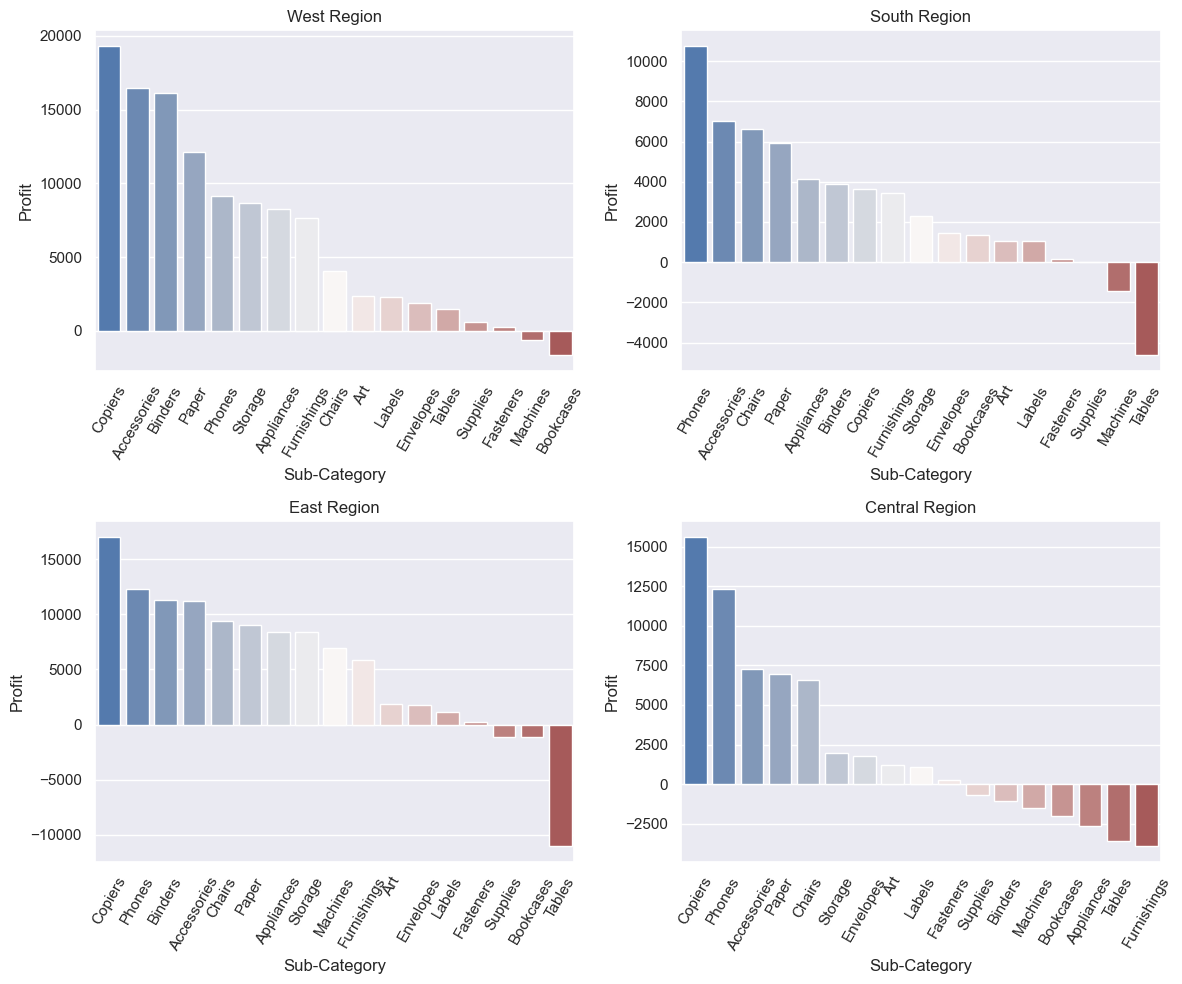

In [41]:
#создаю сетку 2 на 2
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# список регионов
regions = df_region_subcat.Region.unique()
# строю барплот для каждого региона
for region, ax in zip(regions, axs.flatten()):
    sns.barplot(data=df_region_subcat.query(f'Region == "{region}"'),
                x='Sub-Category',
                y='Profit',
                ci=None,
                palette= "vlag",
                ax=ax)
    ax.set_title(f'{region} Region')
    ax.set_xlabel('Sub-Category')
    ax.set_ylabel('Profit')
    ax.tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()

На барплотах выше показаны прибыльные и убыточные подкатегории товаров по регионам. 

<font color = #2B65EC > Cамые прибыльные подкатегории для каждого региона:

In [42]:
df_region_subcat.loc[df_region_subcat.groupby('Region')['Profit'].idxmax()]

,Region,Sub-Category,Profit,Quantity
6,Central,Copiers,15608.8413,49
23,East,Copiers,17022.8418,71
47,South,Phones,10767.2753,526
57,West,Copiers,19327.2351,88


**Точка роста:**    
    <font color = #2B65EC >Рассмотреть расширение товарных линеек по самым прибыльным подкатегориям регионов. 

<font color = #2B65EC > Cамые убыточные  подкатегории для каждого региона:

In [43]:
df_region_subcat.loc[df_region_subcat.groupby('Region')['Profit'].idxmin()]

,Region,Sub-Category,Profit,Quantity
9,Central,Furnishings,-3906.2168,758
33,East,Tables,-11025.3801,271
50,South,Tables,-4623.0579,227
55,West,Bookcases,-1646.5117,306


<font color = #2B65EC > Для убыточных подкатегорий по регионам (Profit<0) посмотрим динамику во времени:

In [44]:
#создаю колонку года заказа типа str (для отображения на графиках)
df['Order_Year'] = pd.DatetimeIndex(df['Order_Date']).year.astype('str')  

In [45]:
#группирую с учетом региона и Sub-категорий и года
df_region_subcat_year = df \
    .groupby(['Region','Sub-Category','Order_Year'], as_index = False) \
    .agg({'Profit':'sum'})

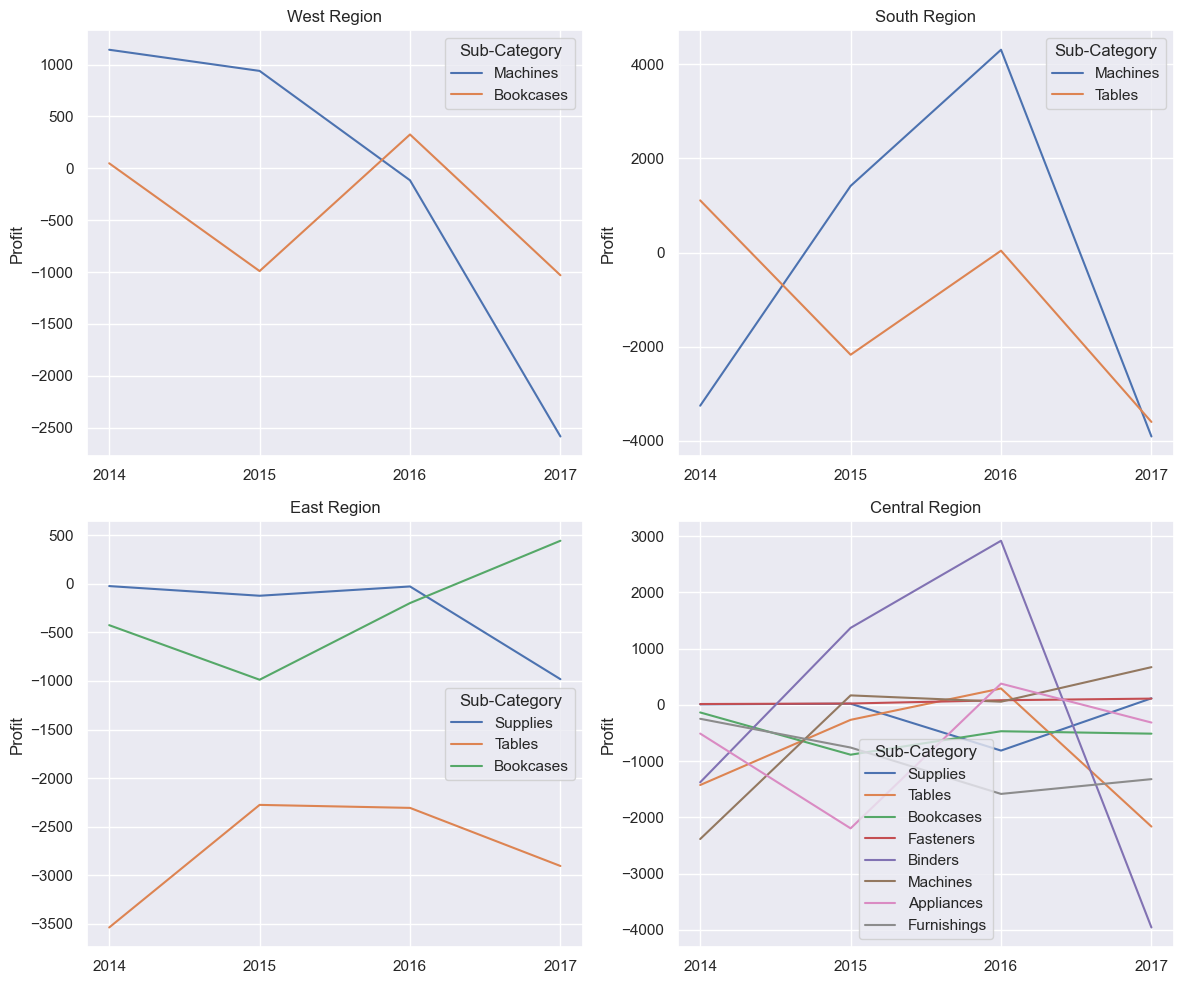

In [46]:
# задаю сетку 2 на 2
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#profit от даты заказа для Machines, Bookcases в West Region
df_subset = pd.concat([df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Machines'],
                       df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Bookcases']]) \
                    .query("Region == 'West'")
sns.lineplot(data=df_subset, x='Order_Year', y='Profit', hue='Sub-Category', ax=axs[0, 0])
axs[0, 0].set_title('West Region')
axs[0, 0].set_xlabel("")

#profit от даты заказа для Machines, Tables в South Region
df_subset1 = pd.concat([df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Machines'],
                       df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Tables']]) \
                    .query("Region == 'South'")
sns.lineplot(data=df_subset1, x='Order_Year', y='Profit', hue='Sub-Category', ax=axs[0, 1])
axs[0, 1].set_title('South Region')
axs[0, 1].set_xlabel("")

#profit от даты заказа для Supplies, Bookcases, Tables в East Region
df_subset2 = pd.concat([df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Supplies'],
                       df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Tables'], 
                       df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Bookcases']
                       ]) \
                    .query("Region == 'East'")
sns.lineplot(data=df_subset2, x='Order_Year', y='Profit', hue='Sub-Category', ax=axs[1, 0])
axs[1, 0].set_title('East Region')
axs[1, 0].set_xlabel("")

#profit от даты заказа для Fasteners, Supplies, Binders, Machines, Bookcases, Appliances,Tables и Furnishings в Central Region
df_subset3 = pd.concat([df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Supplies'],
                        df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Tables'], 
                        df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Bookcases'],
                        df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Fasteners'],
                        df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Binders'],
                        df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Machines'],
                        df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Appliances'],
                        df_region_subcat_year.loc[df_region_subcat_year['Sub-Category'] == 'Furnishings']                        
                       ]) \
                    .query("Region == 'Central'")
sns.lineplot(data=df_subset3, x='Order_Year', y='Profit', hue='Sub-Category', ax=axs[1, 1])
axs[1, 1].set_title('Central Region')
axs[1, 1].set_xlabel("")

plt.tight_layout()
plt.show()

Среди рассмотренных зависимостей положительный рост демонстрирует прибыль от продажи следующих подкатегорий:    
* Bookcases в East Region,    
* Machines,Fasteners и Supplies в Central Region.    

Прибыль от продаж остальных рассмотренных подкатегорий либо падает к 2017 году, либо отрицательна.    
**Точка роста:**     
<font color = #2B65EC > Поднять вопрос о сокращении в регионах продаж категорий, прибыль которых там стабильно падает.     
    Найти причину падения продаж Binders в Central Region и Machines в South Region.
   

### Время доставки <a class="anchor" id="delivery-bullet"></a>

In [47]:
#агрегирую по режимам доставки
df_delivery_mode = df.groupby(['Ship_Mode']) \
    .agg({'Delivery_Time':'mean'}) \
    .rename(columns={'Delivery_Time':'Avg_Delivery_Time'}) \
    .sort_values('Avg_Delivery_Time', ascending = True)
df_delivery_mode

,Avg_Delivery_Time
Ship_Mode,
Same Day,0 days 01:03:38.784530386
First Class,2 days 04:23:05.695708712
Second Class,3 days 05:42:47.197943444
Standard Class,5 days 00:09:24.611260053


<font color = #2B65EC >Выше показаны средние времена доставки для разных Ship Modes по всей стране.

#### Среднее время доставки в зависимости от города и тарифа

In [48]:
#группирую с учетом геогр. положения и режима доставки
df_delivery = df \
    .groupby(['Region','State','City','Ship_Mode'], as_index = False) \
    .agg({'Delivery_Time':'mean'}) \
    .rename(columns={'Delivery_Time':'Avg_Delivery_Time'}) \
    .sort_values(['Avg_Delivery_Time'], ascending = True)
#создаю столбец числа дней, которое шла доставка
df_delivery['Avg_Delivery_Days'] = df_delivery['Avg_Delivery_Time'].dt.total_seconds()/(60*60*24)
df_delivery.head()

,Region,State,City,Ship_Mode,Avg_Delivery_Time,Avg_Delivery_Days
1015,West,California,Oceanside,Same Day,0 days,0.0
561,East,Ohio,Mentor,Same Day,0 days,0.0
1019,West,California,Oxnard,Same Day,0 days,0.0
1137,West,Montana,Billings,Same Day,0 days,0.0
714,South,Georgia,Atlanta,Same Day,0 days,0.0


Действительно ли заявленные режимы доставки предлагают последовательное увеличение скорости с тарифом? Какие есть отклонения? 

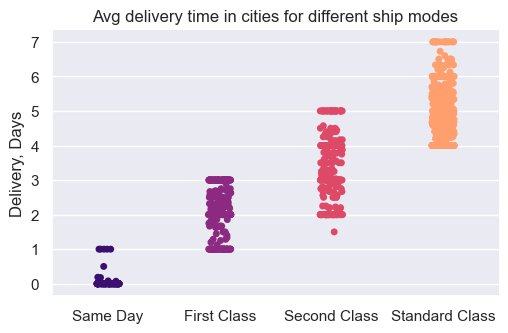

In [59]:
#строю график в разделении по тарифам, где каждая точка - средняя длительность доставки по городу
g = sns.catplot(data=df_delivery, x="Ship_Mode", y="Avg_Delivery_Days", height=3.5, aspect=1.5, palette= 'magma') \
    .set(title='Avg delivery time in cities for different ship modes')
g.set_axis_labels("", "Delivery, Days")
plt.show()

Городам, в которых самая долгая доставка по тарифу, соответсвуют верхние точки каждого цвета.

Найдем список городов, в которых самая долгая доставка  по стандартному тарифу.

In [50]:
#агрегирую по положению для стандартного режима доставки
df_delivery_standart = df.query('Ship_Mode == "Standard Class"') \
    .groupby(['Region','State','City'], as_index = False) \
    .agg({'Delivery_Time':'mean'}) \
    .rename(columns={'Delivery_Time':'Avg_Delivery_Time'}) 

In [51]:
print(f'{Fore.BLUE}В то время как среднее время стандартного режима доставки - {round(df_delivery_standart.Avg_Delivery_Time.dt.days.mean())} дней, в зависимости от города оно составляет от {round(df_delivery_standart.Avg_Delivery_Time.dt.days.min())} до {round(df_delivery_standart.Avg_Delivery_Time.dt.days.max())} дней.')

В то время как среднее время стандартного режима доставки - 5 дней, в зависимости от города оно составляет от 4 до 7 дней.


#### Список городов, где среднее время стандартной доставки в которых достигает 7 дней:<a class="anchor" id="delivery-slow-bullet"></a>

In [52]:
df_slow = df_delivery_standart[df_delivery_standart['Avg_Delivery_Time'] == np.timedelta64(7, 'D')][['Region','State','City']] \
    .sort_values(['Region','State'], ascending = True)
df_slow

,Region,State,City
20,Central,Illinois,Oswego
52,Central,Michigan,Dearborn Heights
72,Central,Minnesota,Lakeville
89,Central,Nebraska,Norfolk
94,Central,Oklahoma,Lawton
110,Central,Texas,College Station
120,Central,Texas,Haltom City
153,Central,Wisconsin,Waukesha
156,East,Connecticut,Danbury
191,East,New Hampshire,Nashua


In [53]:
print('\033[1m' + 'Точка роста:'+ '\033[0m')
print(f'{Fore.BLUE}В {len(df_slow)} городах, указанных выше, рекомендуется обратить особое внимание на работу службы доставки.')

Точка роста:
В 19 городах, указанных выше, рекомендуется обратить особое внимание на работу службы доставки.


#### Среднее время доставки в зависимости от штата<a class="anchor" id="delivery-state-bullet"></a>

In [54]:
#группирую с по штату и тарифу для стандартного режима
df_delivery_state = df.query('Ship_Mode == "Standard Class"') \
    .groupby(['State','Ship_Mode'], as_index = False) \
    .agg({'Delivery_Time':'mean'}) \
    .rename(columns={'Delivery_Time':'Avg_Delivery_Time'}) \
    .sort_values(['Avg_Delivery_Time'], ascending = False)
#создаю столбец числа дней, которое шла доставка
df_delivery_state['Avg_Delivery_Days'] = df_delivery_state['Avg_Delivery_Time'].dt.total_seconds()/(60*60*24)
df_delivery_state.head()

,State,Ship_Mode,Avg_Delivery_Time,Avg_Delivery_Days
7,District of Columbia,Standard Class,6 days 00:00:00,6.000000
26,Nevada,Standard Class,5 days 16:00:00,5.666667
13,Iowa,Standard Class,5 days 12:00:00,5.500000
34,Oklahoma,Standard Class,5 days 11:14:02.553191489,5.468085
1,Arizona,Standard Class,5 days 07:15:06.474820143,5.302158


In [55]:
print(f'{Fore.BLUE}Самая быстрая стандартная доставка - в штате {df_delivery_state.tail(1).State.values[0]} ({round(df_delivery_state.tail(1).Avg_Delivery_Days.values[0])} дня).')

Самая быстрая стандартная доставка - в штате West Virginia (4 дня).


In [56]:
print('\033[1m' + 'Точка роста:'+ '\033[0m')
print(f'{Fore.BLUE}В штате {df_delivery_state.head(1).State.values[0]} самая высокая средняя длительность стандартной доставки ({round(df_delivery_state.head(1).Avg_Delivery_Days.values[0])} дней). Рекомендуется обратить внимание на работу там службы доставки.')

Точка роста:
В штате District of Columbia самая высокая средняя длительность стандартной доставки (6 дней). Рекомендуется обратить внимание на работу там службы доставки.


#### Среднее время доставки в зависимости от региона <a class="anchor" id="delivery-region-bullet"></a>

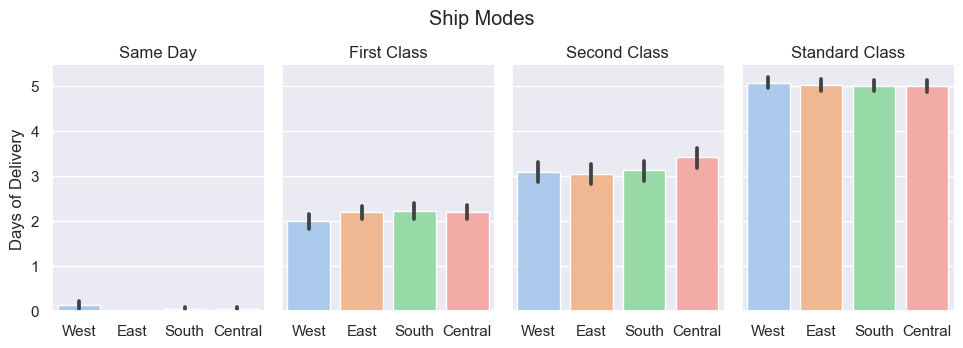

In [62]:
g = sns.catplot(
    data=df_delivery, x="Region", y="Avg_Delivery_Days", col="Ship_Mode",
    kind="bar", height=3.5, aspect=.7, palette = 'pastel'
)
g.set_axis_labels("", "Days of Delivery")
g.set_titles("{col_name}")
sns.set_palette("deep")
g.fig.suptitle('Ship Modes', y=1.05)
plt.show()

<font color = #2B65EC >Из графика выше видно, что принципиальной разницы в скорости доставки по регионам нет ни по одному из тарифов.

## 2. Выводы и рекомендации <a class="anchor" id="two-bullet"></a>

#### Наиболее прибыльны продажи (по регионам):    

 |              | South    | Central  | East     | West     |
|--------------|----------|----------|----------|----------|
| **Segment**      | Consumer | Corporate | Consumer | Consumer [[1]](#profit-subcategories-bullet) |
| **Category**     | Office Supplies, Technology | Technology | Technology | Office Supplies [[2]](#profit-subcategories-bullet)|
| **Sub-Category** | Phones, Accessories, Chairs   | Copiers, Phones, Accessories | Copiers, Phones, Binders | Copiers,Accessories, Binders [[3]](#profit-subcategories-bullet)|

#### Убыточны продажи (по регионам):     

|              | South    | Central  | East     | West     |
|--------------|----------|----------|----------|----------|
| **Sub-Category** | Machines, Tables   | Binders, Bookcases, Appliances,Tables и Furnishings   | Supplies, Tables  | Machines, Bookcases  [[4]](#profit-subcategories-bullet)|    


* Провести проверку товаров с наибольшим числов возвратов и отказаться от распространения некачественных. [[5]](#returns-bullet)
* Сократить продажу товаров, приносящих наибольшие убытки компании. [[6]](#2)
* Продажу товаров, убыточных в конкретных штатах, сократить в этих штатах. [[7]](#3)
* Рассмотреть причины более узкой товарной линейки на юге, расширить продажу прибыльных товаров. [[8]](#number-bullet) 
* Расширять линейки более прибыльных по регионам сегментов,  не расширять - менее прибыльных. Изучить причины низких прибылей от сегмента Consumer в центральном регионе. [[9]](#profit-segments-bullet) 
* Рассмотреть возможность расширения линейки товаров самых прибыльных по штатам сегментов.[[10]](#profit-segments-states-bullet) 
* Сократить поставку товаров в самых убыточных штатах. [[11]](#profit-segments-badstates-bullet)  
* Изучить причины низкой прибыльности категории Office Supplies в центральном регионе. Не расширять продажу категории Furniture, как наименее прибыльной. Изучить и доработать текущую стратегию по данной категории во всех регионах. Расширять поставку более прибыльных категорий по регионам и не расширять - менее прибыльных, с учетом статистики по штатам и городам. [[12]](#profit-categories-bullet)  
* Рассмотреть расширение товарных линеек по самым прибыльным подкатегориям регионов. Найти причину падения продаж Binders в Central Region и Machines в South Region. [[13]](#profit-subcategories-bullet)  
* Регионы по скорости доставки принципиально не отличаются. [[14]](#delivery-region-bullet)    
* Рекомендуется улучшить скорость доставки в штате [District of Columbia](#delivery-state-bullet) и [19 городах](#delivery-slow-bullet) с самой медленной доставкой.